In [2]:
#Important Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import seaborn as sns 


data = pd.read_csv('CocaCola.csv')

In [6]:
#Define usefull functions
#function for detecting missing data
def null_data (data):
    nan_column = data.columns[data.isnull().any()]
    print(data[data.isnull().any(axis = 1)][nan_column].head())
#getting dates function
def get_dates(data, year,values):
    aux_date = []
    aux_index = []
    
    for j in range (len(data)):
        date = str(data[j])
        if (date[:4]== year):
            aux_date.append(data[j])
            aux_index.append(values[j])
    return np.array(aux_date), np.array(aux_index)



In [7]:
# Look for missing data 
null_data(data)
# Describe data
data.describe()

Empty DataFrame
Columns: []
Index: []


Open         High          Low        Close    Adj Close  \
count  2320.000000  2320.000000  2320.000000  2320.000000  2320.000000   
mean     50.340315    50.677160    49.988457    50.336716    44.060334   
std       7.411833     7.466321     7.345113     7.412830    10.012058   
min      37.990002    38.189999    36.270000    37.560001    28.730268   
25%      43.907500    44.189999    43.630001    43.937499    35.246478   
50%      48.284999    48.740000    47.939999    48.299999    41.844521   
75%      56.735000    56.980000    56.295001    56.650002    52.384642   
max      67.000000    67.199997    65.720001    66.209999    62.319378   

             Volume  
count  2.320000e+03  
mean   1.413058e+07  
std    6.171339e+06  
min    2.996300e+06  
25%    1.030965e+07  
50%    1.285225e+07  
75%    1.602658e+07  
max    6.784570e+07

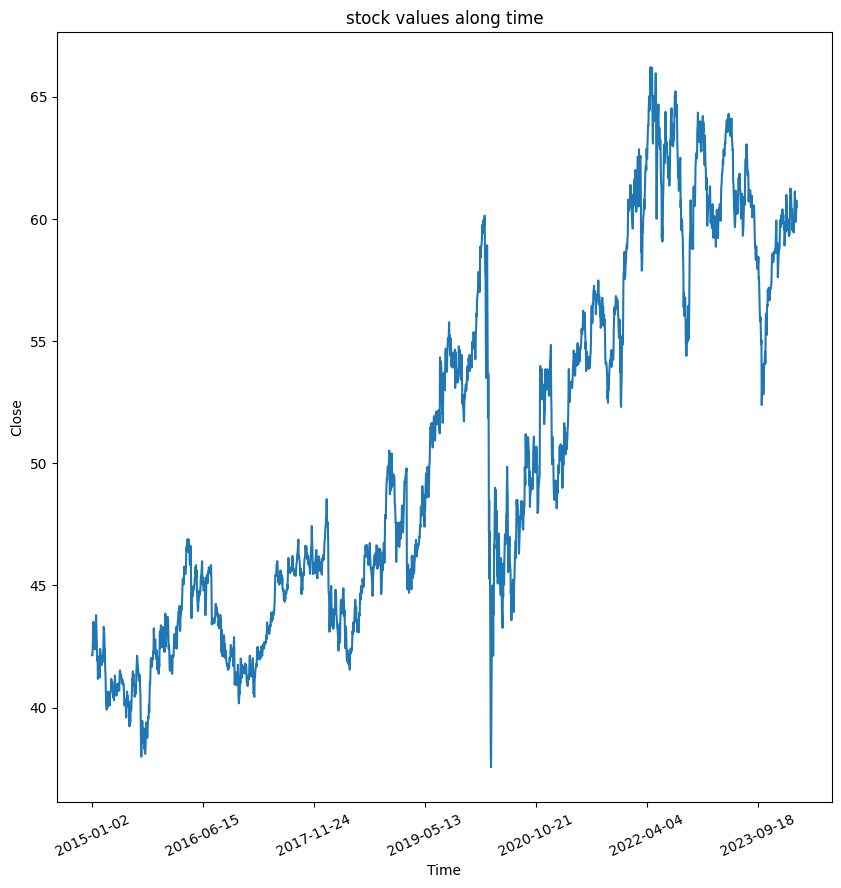

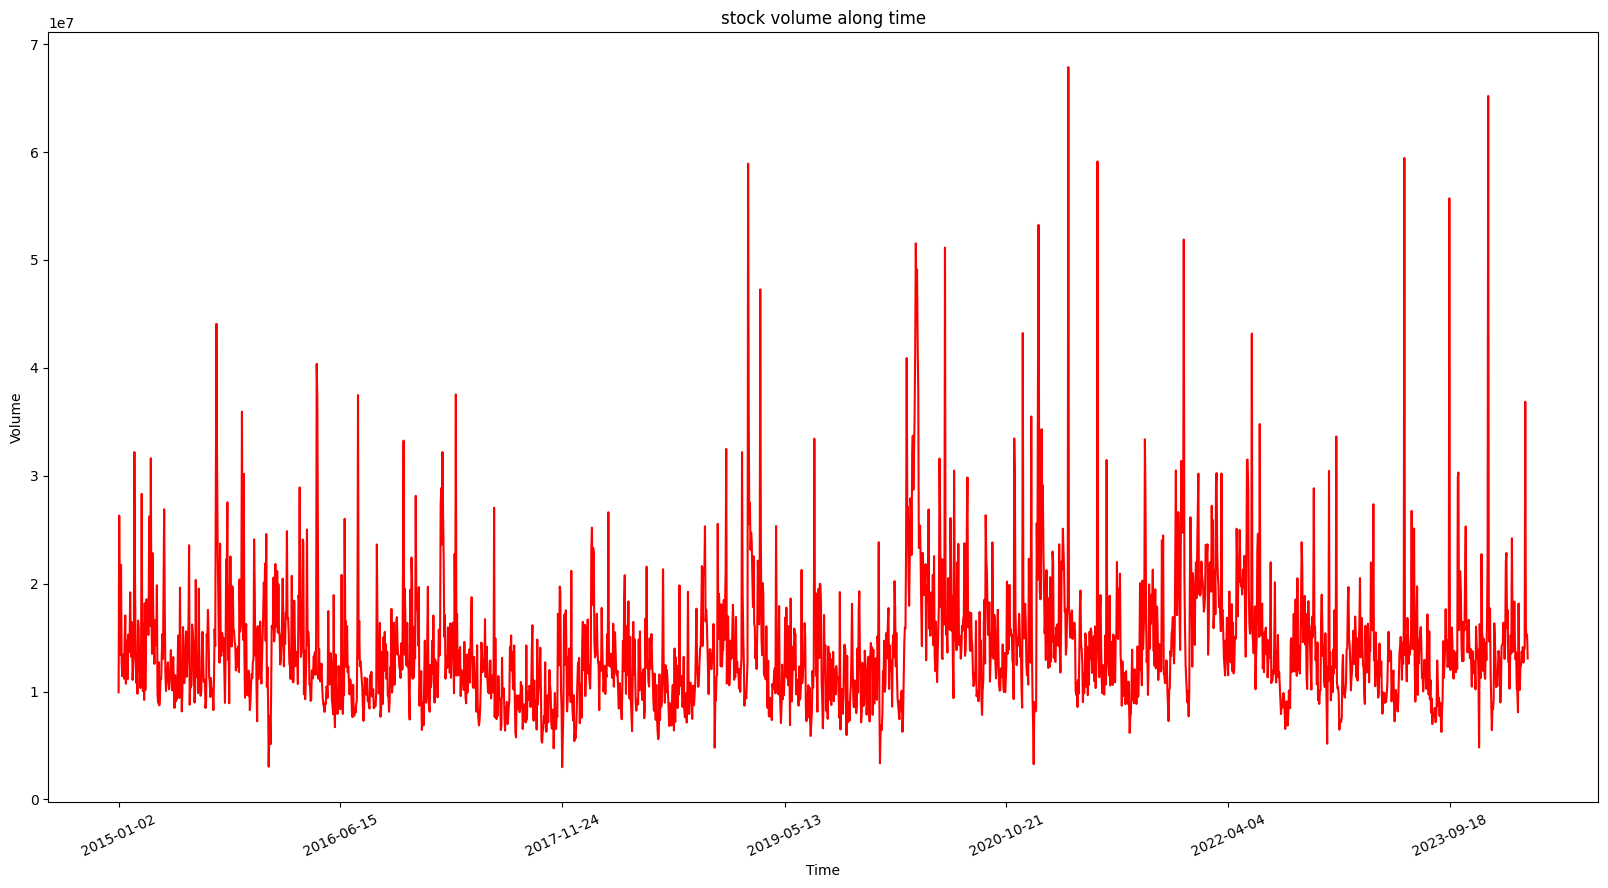

In [5]:
# CLose and volume graphs
# m = mdates.DateFormatter('%Y')
# ax.xaxis.set_major_formatter(m)

dates = data['Date'].copy().values

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(dates, data['Close'])
plt.xlabel('Time')
plt.ylabel('Close')
plt.title('stock values along time')
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks( rotation=25 )
plt.savefig('CLOSE_annual.jpg')

fig2, ax2 = plt.subplots(figsize=(20, 10))
ax2.plot(data['Date'], data['Volume'],'r')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('stock volume along time')
ax2.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks( rotation=25 )
plt.savefig('VOLUME.jpg')
plt.show()




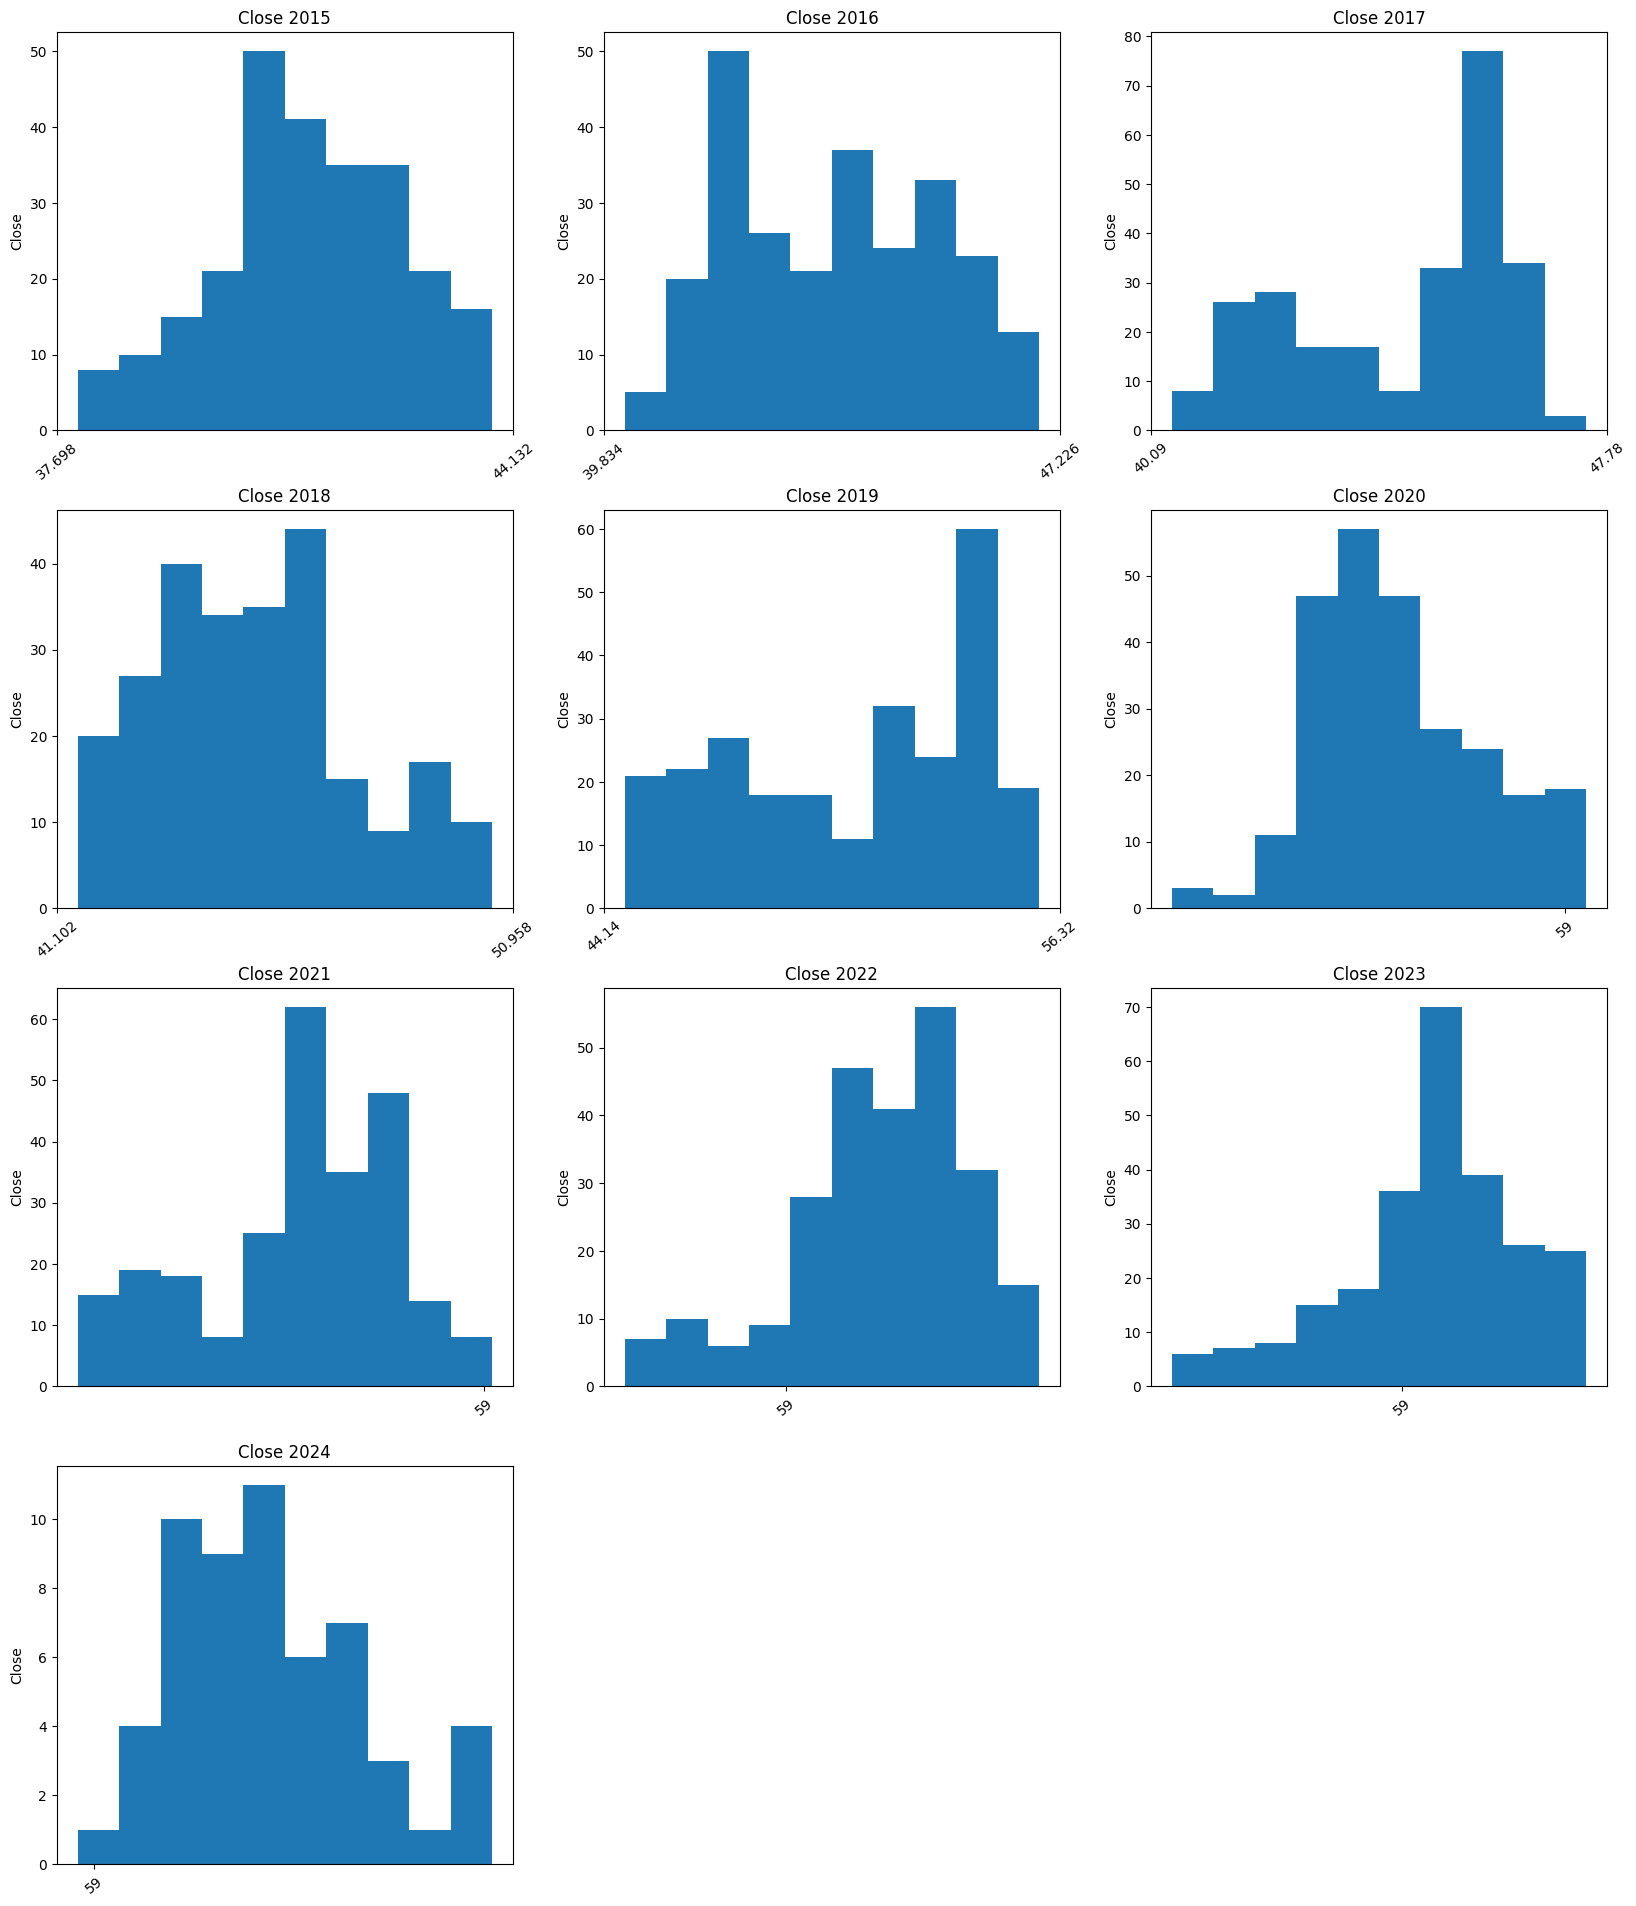

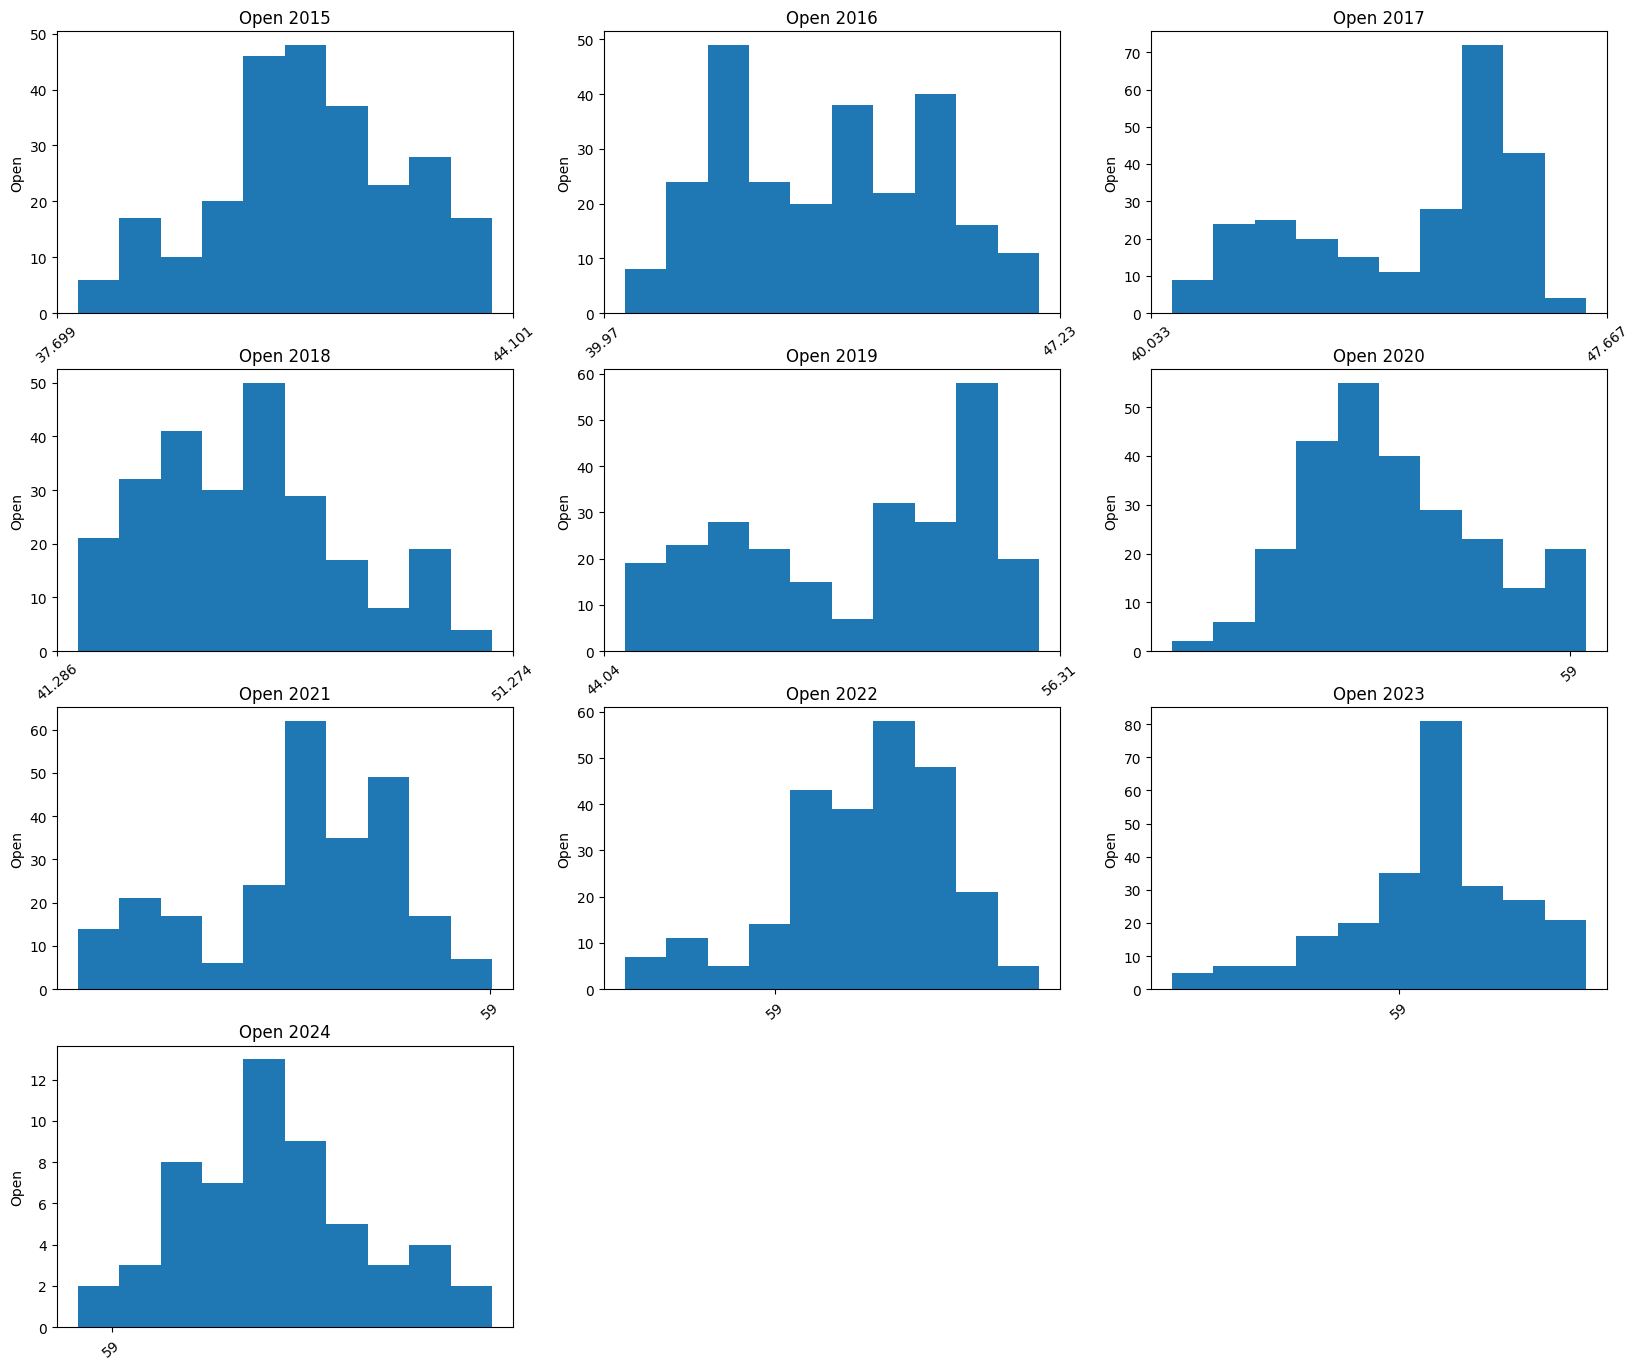

In [8]:
# annual close andopen distribution 

dates = np.arange(2015,2025)
counter = 0
plt.figure(figsize = (20,30))

for i in dates:
    vector_f, vector_d = get_dates(data['Date'],str(i),data['Close'])
    
    ax = plt.subplot(5,3, counter + 1)
    ax.hist(vector_d,10)
    plt.ylabel('Close')
    plt.title(f'Close {i}')
    plt.xticks( rotation=40 )
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    counter +=1
    
plt.savefig(f'Close.jpg')
plt.show()
    
counter = 0
plt.figure(figsize = (20,30))


for i in dates:
    vector_f, vector_d = get_dates(data['Date'],str(i),data['Open'])
    ax = plt.subplot(7,3, counter + 1)
    ax.hist(vector_d,10)
    plt.ylabel('Open')
    plt.title(f'Open {i}')
    plt.xticks( rotation=40 )
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    counter += 1
plt.savefig(f'Open.jpg')
plt.show()

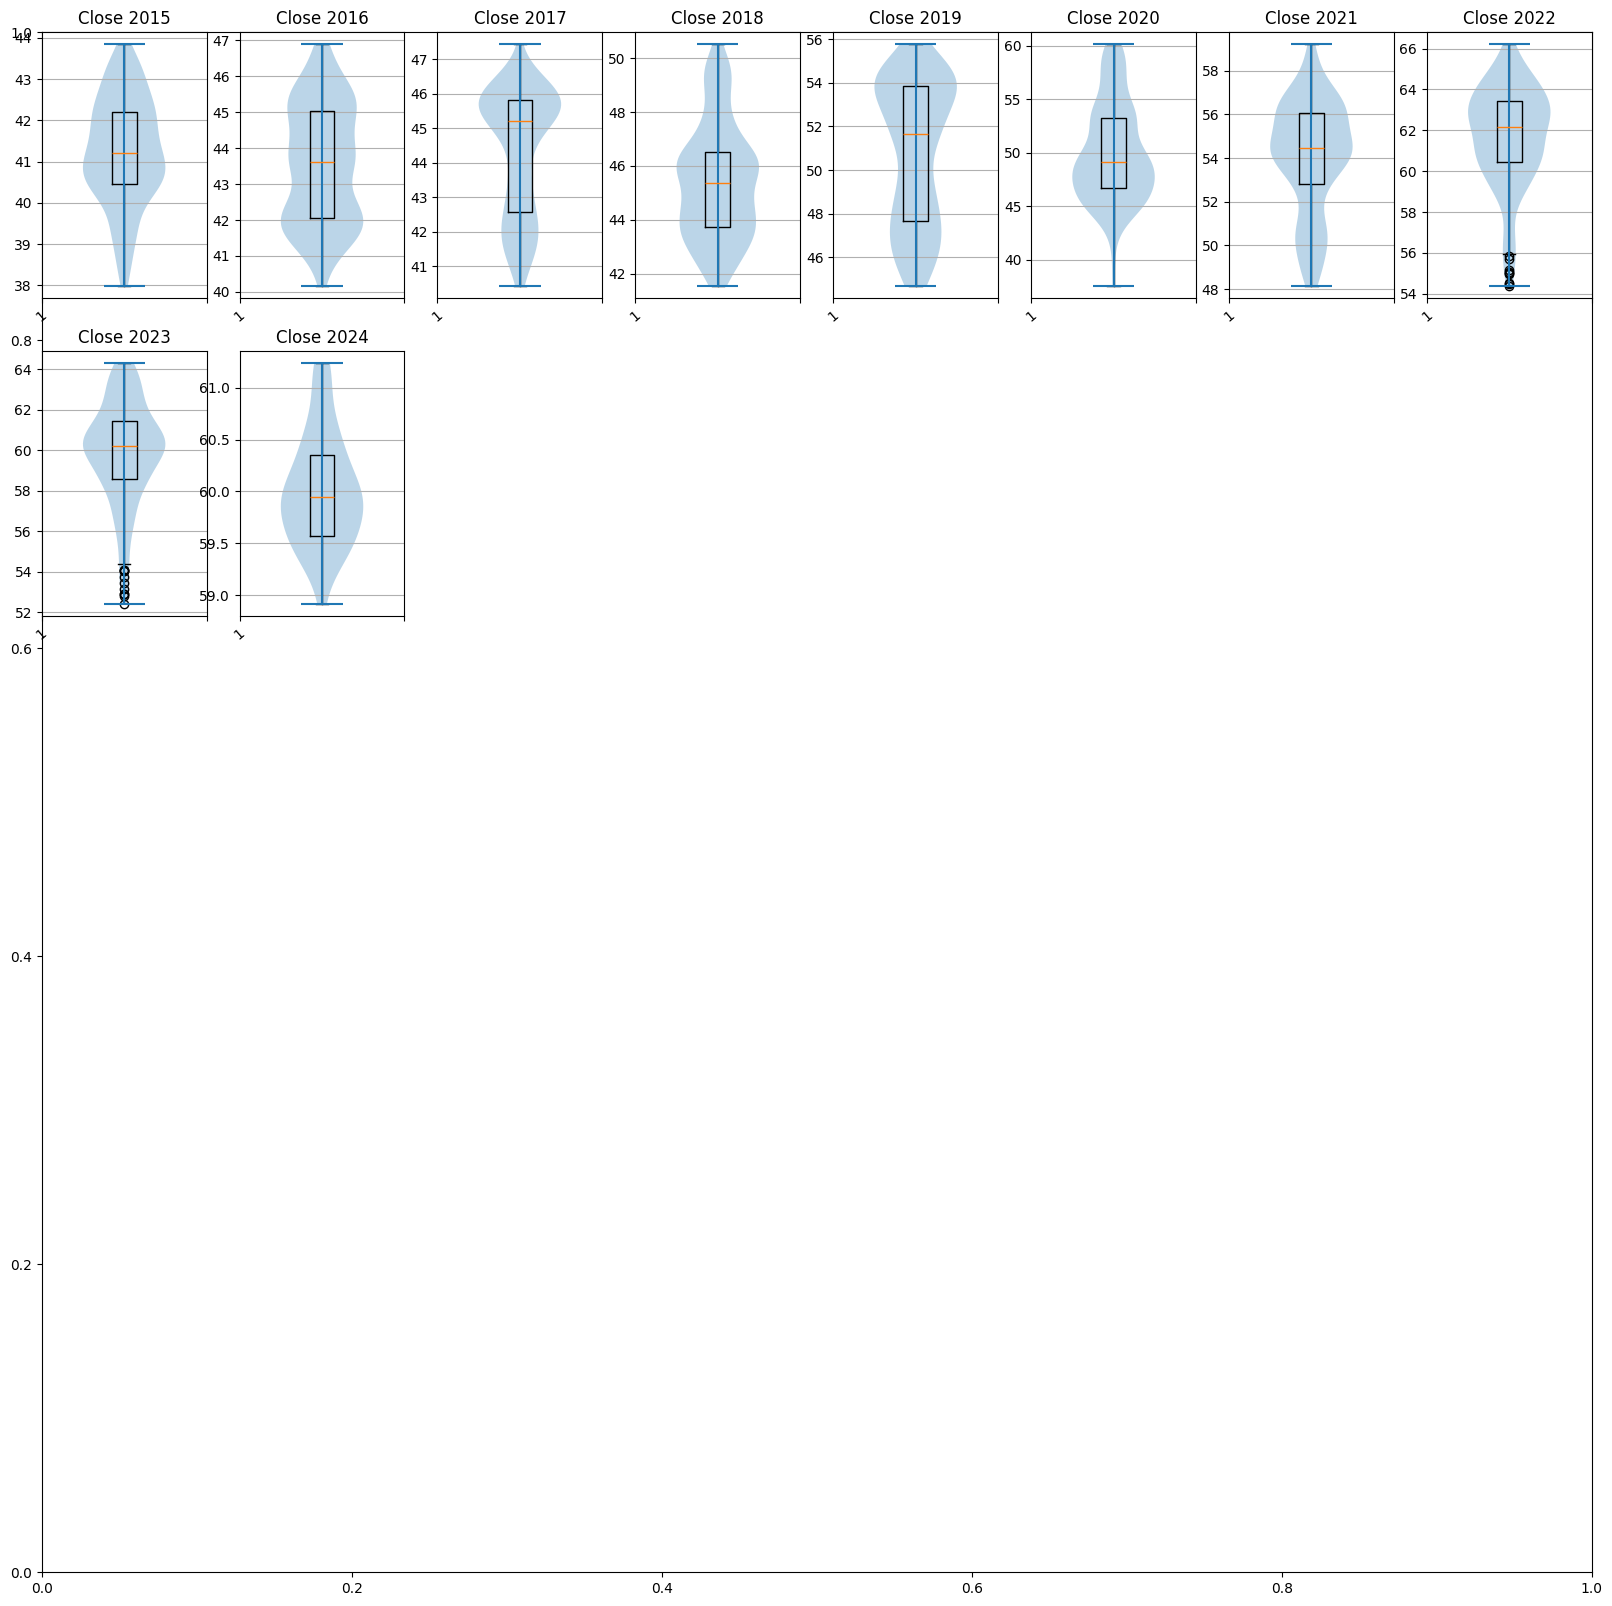

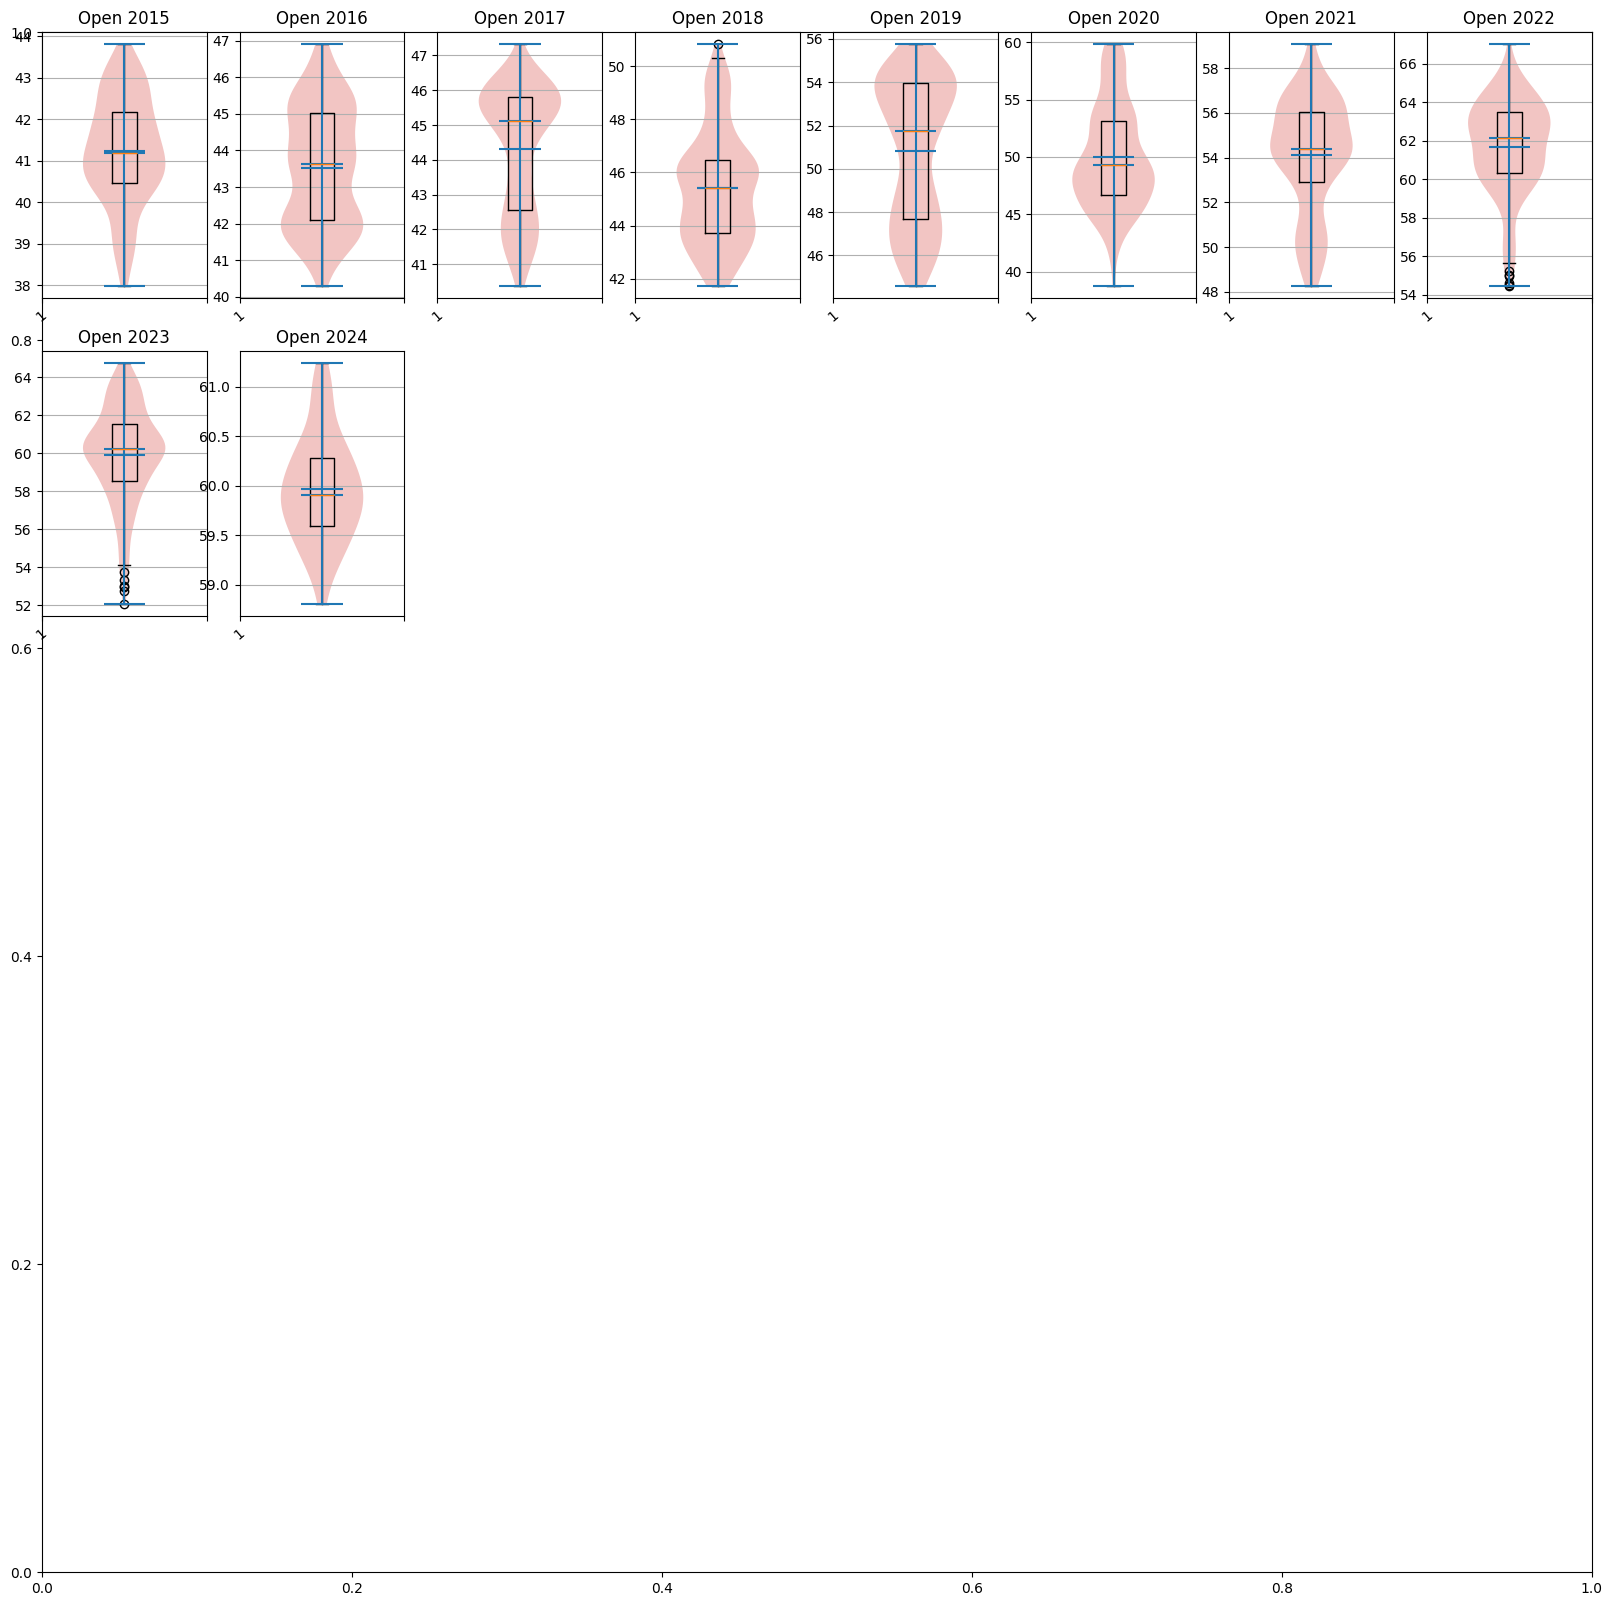

In [11]:
dates = np.arange(2015,2025)
counter = 0
fig, ax = plt.subplots(figsize = (20,20))

for i in dates:
    vector_f, vector_d = get_dates(data['Date'],str(i),data['Close'])
    ax = plt.subplot(5,8, counter + 1)
    ax.boxplot(vector_d)
    ax.violinplot(vector_d)
    plt.title(f'Close {i}')
    plt.xticks( rotation=40 )
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.yaxis.grid(True)
    counter +=1
    plt.savefig(f'Close_box.jpg')
plt.show()

counter = 0
fig, ax = plt.subplots(figsize = (20,20))

for i in dates:
    vector_f, vector_d = get_dates(data['Date'],str(i),data['Open'])
    ax = plt.subplot(5,8, counter + 1)
    ax.boxplot(vector_d)
    violin = ax.violinplot(vector_d, showmeans=True, showmedians=True)
    
    for parts in violin['bodies']:
        parts.set_facecolor('#D43F3A')
        
        
    plt.title(f'Open {i}')
    plt.xticks( rotation=40 )
    ax.yaxis.grid(True)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    counter +=1
    
plt.savefig(f'Open_box.jpg')
plt.show()



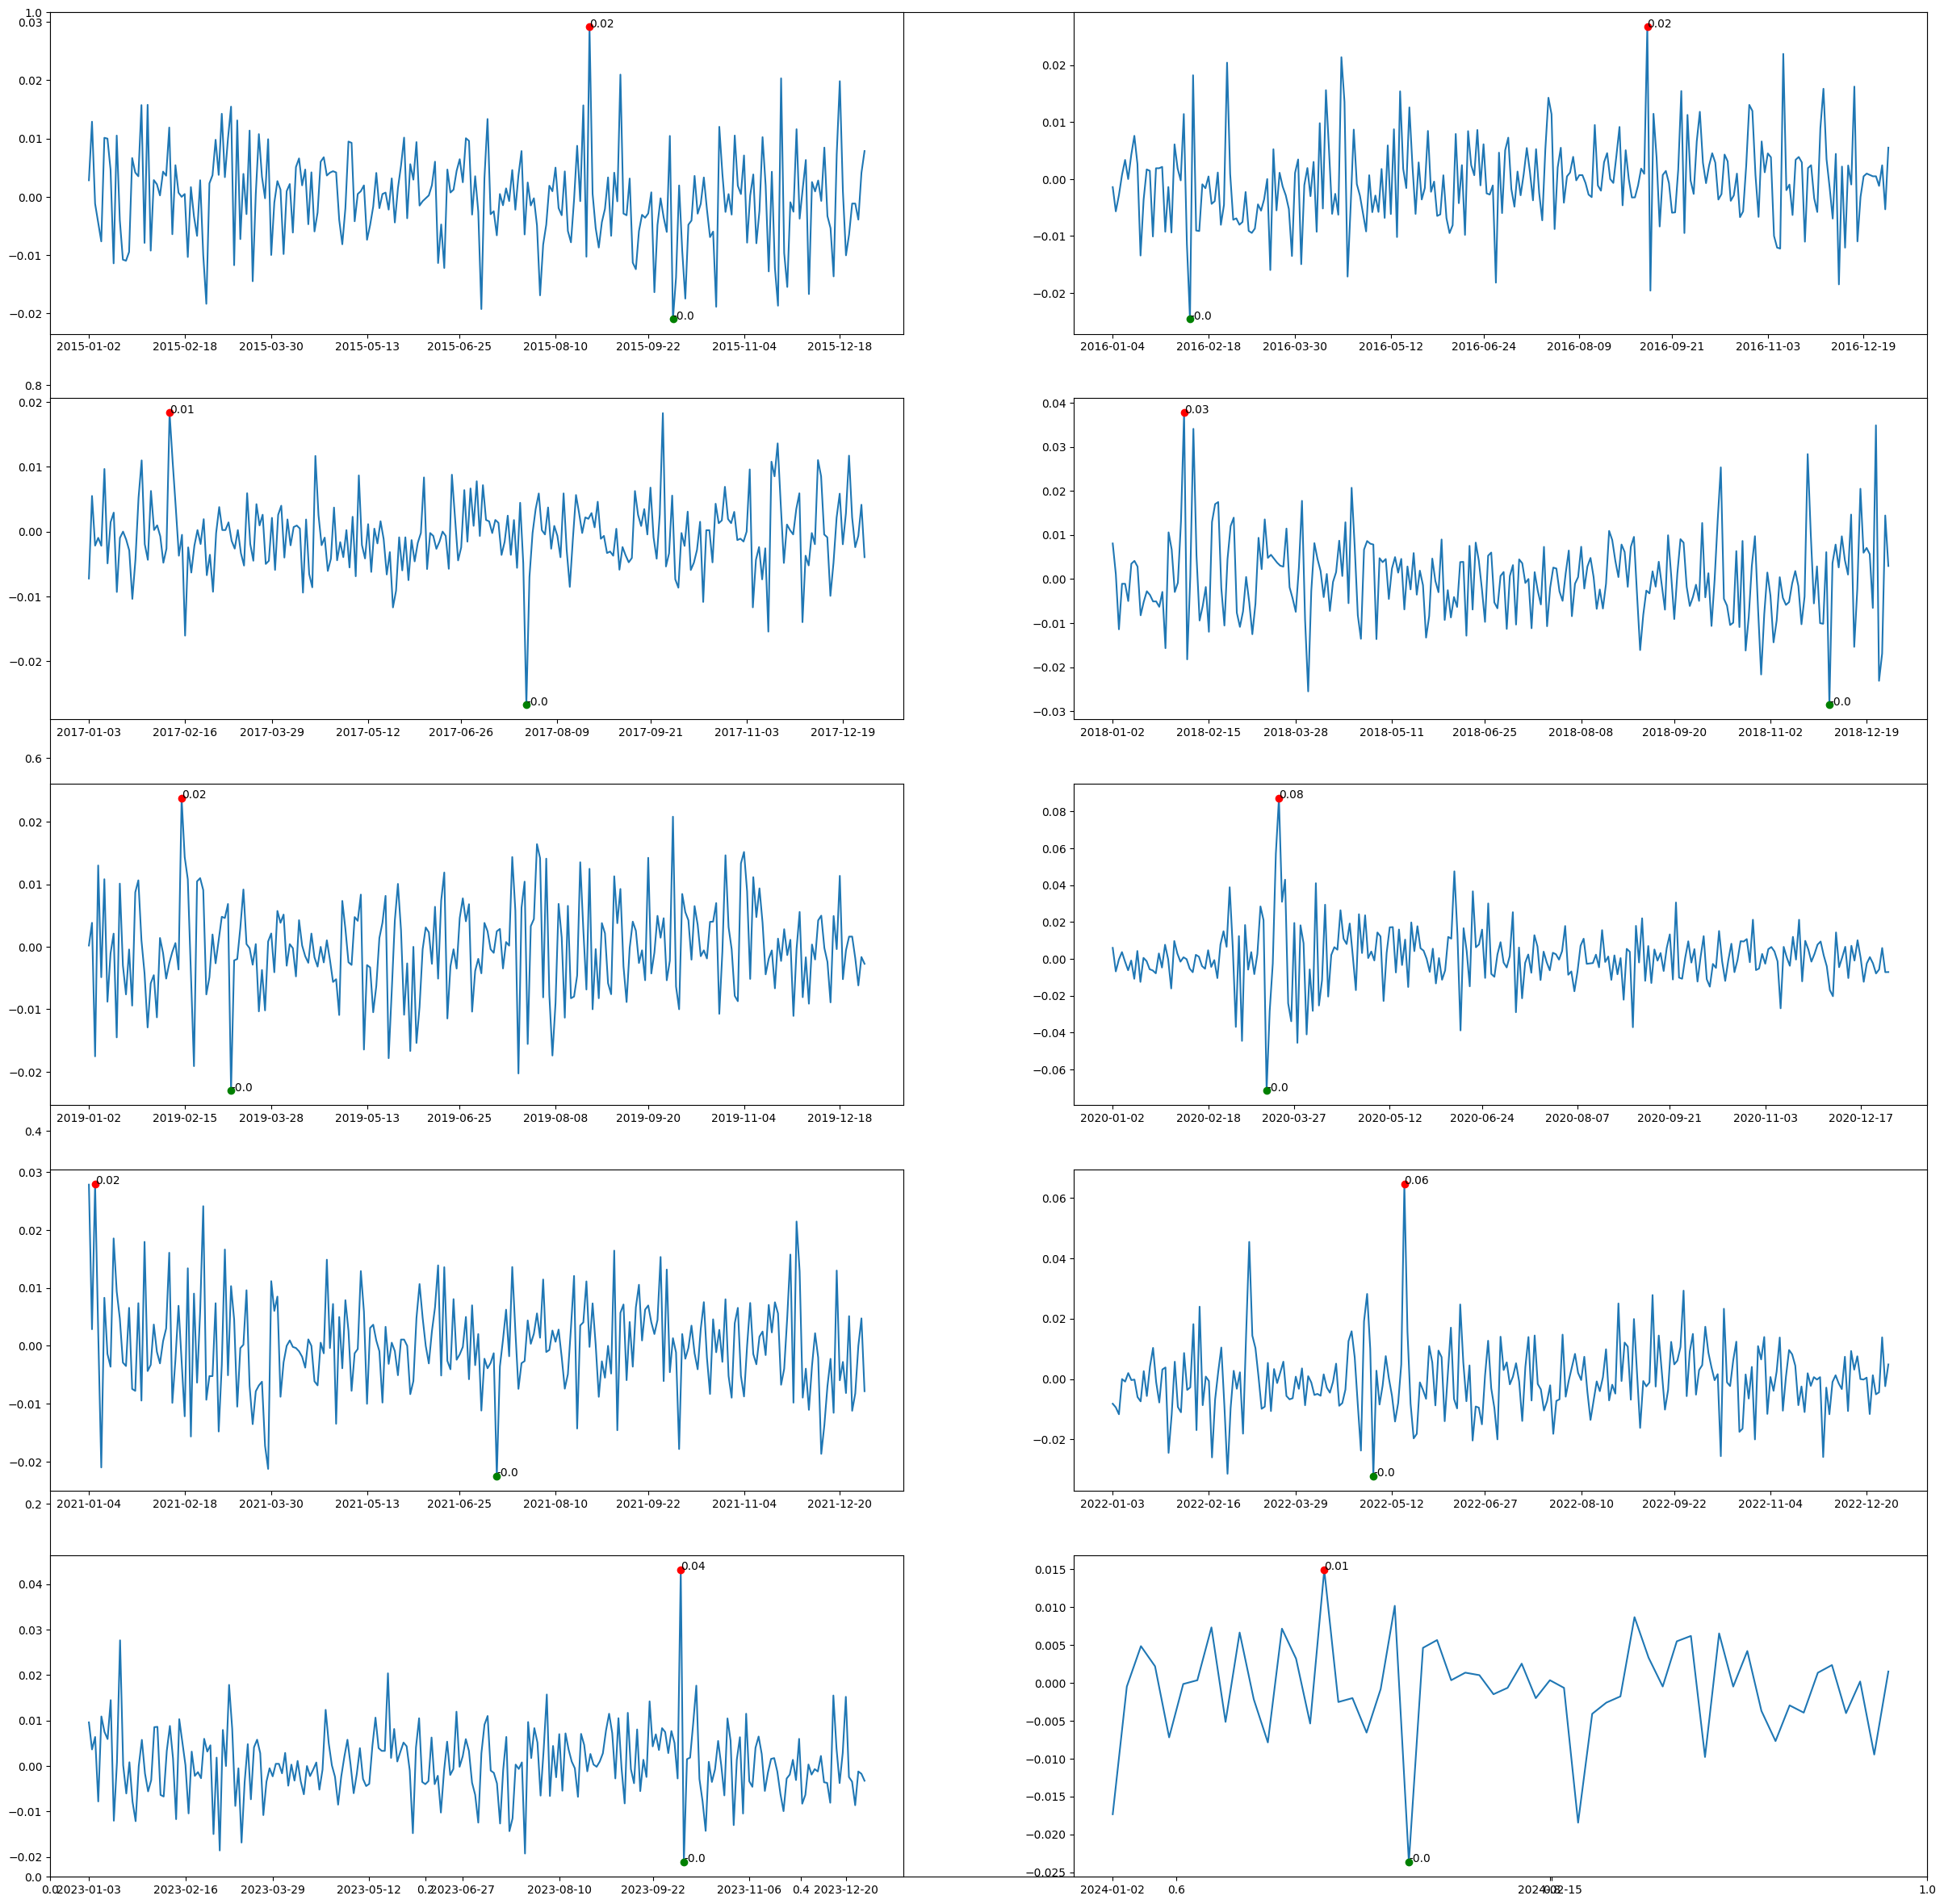

In [10]:
# Get open and close difference (Gains)

dates= np.arange(2015,2025)
counter = 0
fig, ax = plt.subplots(figsize = (30,30))

for i in dates:
    vector_f_close, vector_d_close = get_dates(data['Date'],str(i),data['Close'])
    vector_f_open, vector_d_open = get_dates(data['Date'],str(i),data['Open'])
    ax = plt.subplot(5,2, counter + 1)
    gains = (vector_d_open - vector_d_close)/vector_d_open
    ax.plot(vector_f_close, gains)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    counter += 1
    i_max = np.argmax(gains)
    i_min = np.argmin(gains)
    ax.plot(vector_f_close[i_max],gains[i_max],'or')
    maximum = str(gains[i_max])
    minimum = str(gains[i_min])
    ax.text(vector_f_close[i_max],gains[i_max],maximum[:4])
    ax.plot(vector_f_close[i_min],gains[i_min], 'og')
    ax.text(vector_f_close[i_min],gains[i_min], minimum[:4])
    

plt.savefig(f'Ganancia anual.jpg')
plt.show()